In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
from sklearn.preprocessing import LabelEncoder
from  sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error



In [3]:
dataset = pd.read_csv("Sales Data.csv")

In [4]:
len(dataset)

4572

In [5]:
dataset.head()


,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [6]:
dataset.describe()


,TV,Radio,Social Media,Sales
count,4562.000000,4568.000000,4566.000000,4566.000000
mean,54.066857,18.160356,3.323956,192.466602
std,26.125054,9.676958,2.212670,93.133092
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.525957,1.527849,112.322882
50%,53.000000,17.859513,3.055565,189.231172
75%,77.000000,25.649730,4.807558,272.507922
max,100.000000,48.871161,13.981662,364.079751


In [7]:
dataset.isnull().sum().sum()

26

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [10]:
# radio socialmedia tv 
TVmean = np.mean(dataset['TV'])
dataset['TV'].fillna(TVmean,inplace=True)

radiomean = np.mean(dataset['Radio'])
dataset['Radio'].fillna(radiomean,inplace=True)

SocialMediamean = np.mean(dataset['Social Media'])
dataset['Social Media'].fillna(SocialMediamean,inplace=True)

salesmean = np.mean(dataset['Sales'])
dataset['Sales'].fillna(salesmean,inplace=True)

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4572 non-null   float64
 1   Radio         4572 non-null   float64
 2   Social Media  4572 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4572 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


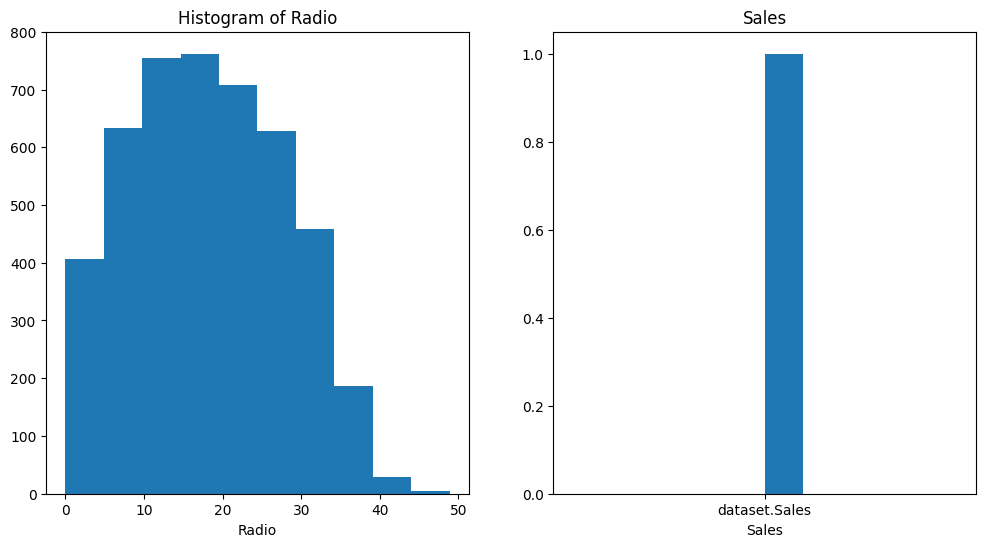

In [12]:
fig = plt.figure(figsize=(12, 6))
Radio = fig.add_subplot(121)
Sales = fig.add_subplot(122)

Radio.hist(dataset.Radio, bins=10)
Radio.set_xlabel('Radio')
Radio.set_title("Histogram of Radio")

Sales.hist("dataset.Sales", bins=10)
Sales.set_xlabel('Sales')
Sales.set_title("Sales")

plt.show()


Text(0, 0.5, 'Sales')

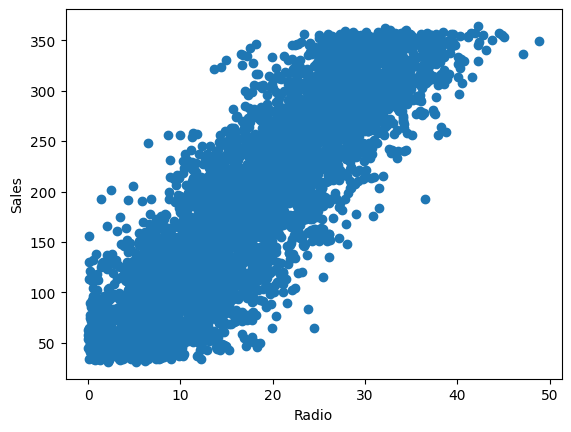

In [13]:
fig = plt.scatter(dataset.Radio, dataset.Sales)
plt.xlabel('Radio')
plt.ylabel('Sales')

In [14]:

le = LabelEncoder()
le.fit(dataset['Influencer'])
dataset['Influencer'] =le.transform(dataset['Influencer'])


In [15]:
print(dataset["Influencer"])

0       1
1       1
2       1
3       1
4       2
       ..
4567    2
4568    3
4569    2
4570    0
4571    2
Name: Influencer, Length: 4572, dtype: int32


In [16]:
print(LabelEncoder().fit_transform(dataset["Influencer"]))

[1 1 1 ... 2 0 2]


X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [17]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [18]:
print(X.shape)
print(y.shape)

(4572, 4)
(4572,)


In [19]:
print(dataset["Influencer"].min())
print(dataset["Influencer"].max())
print(dataset["Radio"].min())
print(dataset["Radio"].max())


0
3
0.000683948
48.87116125


In [20]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

standard scaler


In [21]:
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)
X 

array([[-1.45885758, -1.19877233, -0.18814019, -0.45370681],
       [-1.57382827, -0.92254961, -0.41356806, -0.45370681],
       [-0.5007685 , -0.23511047, -0.18568543, -0.45370681],
       ...,
       [-0.38579782,  0.16953817,  0.80156271,  0.44466805],
       [ 0.64893839, -0.06469574, -0.62555319, -1.35208167],
       [-0.46244494, -0.22681392,  0.77910916,  0.44466805]])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [23]:
X.shape 
y.shape

(4572,)

In [24]:
X_test.shape

(915, 4)

In [25]:
X_train.shape

(3657, 4)

In [26]:
y_test.shape

(915,)

In [27]:
y_train.shape

(3657,)

# Model

In [28]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
#regressor.fit(X,y)

LinearRegression()

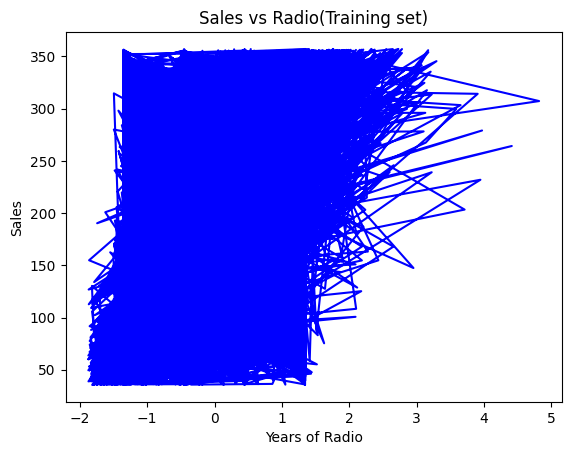

In [29]:
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Sales vs Radio(Training set)')
plt.xlabel('Years of Radio')
plt.ylabel('Sales')
plt.show()

In [30]:
y_train_pred = regressor.predict(X_train)
print(np.concatenate((y_train.reshape(len(y_train),1),y_train_pred.reshape(len(y_train),1)), axis=1))

[[320.4673397  323.46664343]
 [174.947983   173.90349214]
 [290.5860748  288.17034915]
 ...
 [227.5973666  224.78144076]
 [112.4151112  111.14334296]
 [ 63.48794091  61.32879227]]


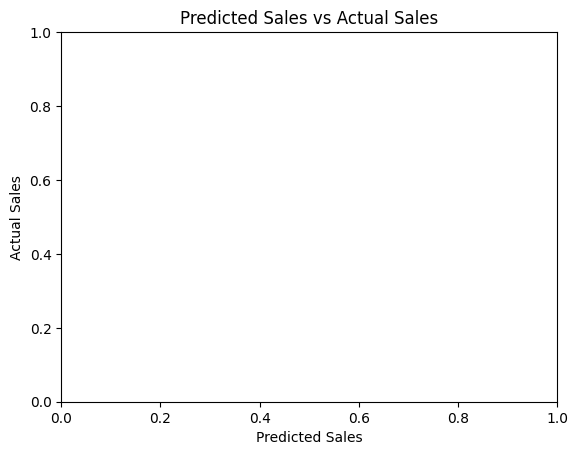

In [32]:
plt.title('Predicted Sales vs Actual Sales')
plt.xlabel('Predicted Sales')
plt.ylabel('Actual Sales')
plt.show()

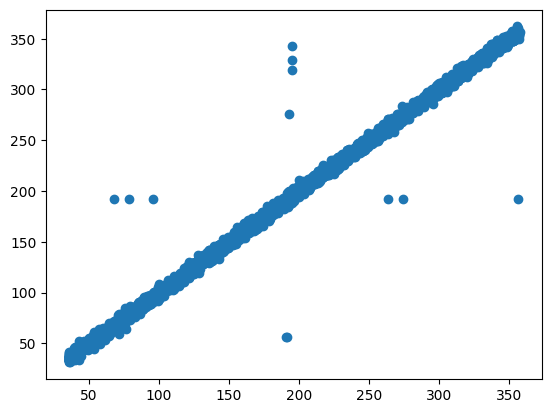

In [33]:
plt.scatter(y_train_pred, y_train)



In [35]:
y_train_pred = regressor.predict(X_train)
print(np.concatenate((y_train.reshape(len(y_train),1),y_train_pred.reshape(len(y_train),1)), axis=1))

[[320.4673397  323.46664343]
 [174.947983   173.90349214]
 [290.5860748  288.17034915]
 ...
 [227.5973666  224.78144076]
 [112.4151112  111.14334296]
 [ 63.48794091  61.32879227]]


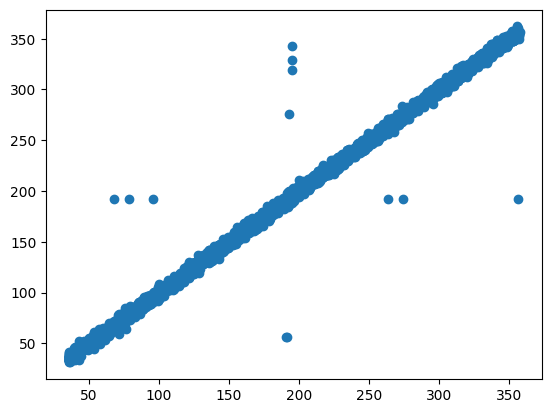

In [36]:
plt.scatter(y_train_pred, y_train)


In [37]:
print('R2 = ', r2_score(y_train, y_train_pred))
print('MAE = ', mean_absolute_error(y_train, y_train_pred))
print('MRSE = ', mean_squared_error(y_train, y_train_pred))

R2 =  0.9935241925545413
MAE =  2.777605839738082
MRSE =  56.65660061190058


predicting test results 

In [38]:
y_test_pred = regressor.predict(X_test)
print(np.concatenate((y_test.reshape(len(y_test), 1), y_test_pred.reshape(len(y_test), 1)), axis=1))


[[354.7973747  356.08980169]
 [ 65.125304    65.14617457]
 [265.8166987  266.33136269]
 ...
 [338.7906266  341.72986413]
 [242.9308757  238.07987907]
 [ 98.6526218   97.06594117]]


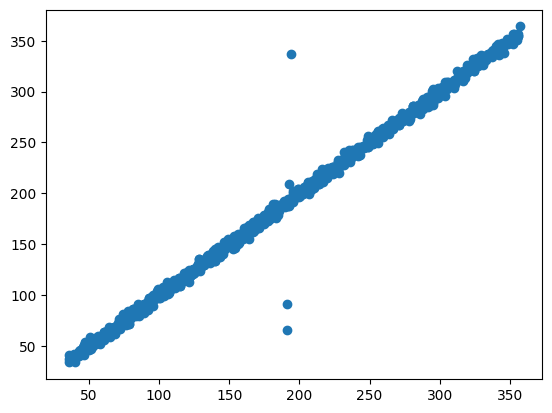

In [39]:
plt.scatter(y_test_pred, y_test)

In [40]:
print('R2 = ', r2_score(y_test, y_test_pred))
print('MAE = ', mean_absolute_error(y_test, y_test_pred))
print('MRSE = ', mean_squared_error(y_test, y_test_pred))

R2 =  0.9926619620066264
MAE =  2.9317583637774987
MRSE =  60.739964476201386


In [41]:
y_train_pred = regressor.predict(X_train)
print(np.concatenate((y_train.reshape(len(y_train), 1), y_train_pred.reshape(len(y_train), 1)), axis=1))

[[320.4673397  323.46664343]
 [174.947983   173.90349214]
 [290.5860748  288.17034915]
 ...
 [227.5973666  224.78144076]
 [112.4151112  111.14334296]
 [ 63.48794091  61.32879227]]


visualize the training set results


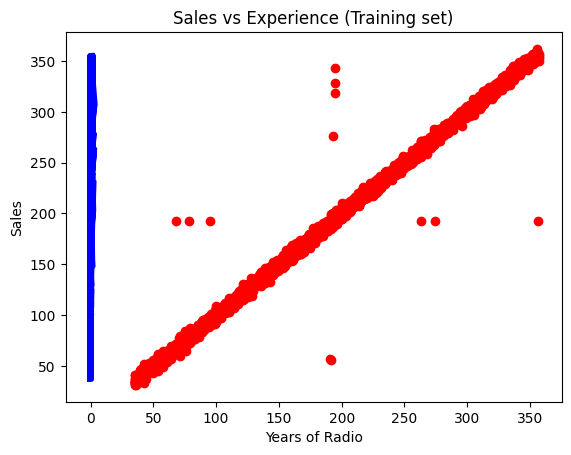

In [42]:
plt.scatter(y_train_pred, y_train, color='red')
# Plot the regression line
plt.plot(X_train, y_train_pred, color='blue')

# Add titles and labels
plt.title('Sales vs Experience (Training set)')
plt.xlabel('Years of Radio')
plt.ylabel('Sales')

# Show the plot
plt.show()


In [43]:
y_train_pred = regressor.predict(X_train)
print(np.concatenate((y_train.reshape(len(y_train),1),y_train_pred.reshape(len(y_train),1)), axis=1))

[[320.4673397  323.46664343]
 [174.947983   173.90349214]
 [290.5860748  288.17034915]
 ...
 [227.5973666  224.78144076]
 [112.4151112  111.14334296]
 [ 63.48794091  61.32879227]]
